## Implementing Linear Regression from Scratch

In [2]:
import numpy as np

<b>Linear Regression:</b> Y = wX + b <br>

Y -> Dependent Variable, X -> Independent Variable <br>
w -> weight, b -> bias

<b>Gradient Descent:</b> An optimization algorithm used for minimizing the loss function in various machine learning algorithms. <br>
It is used for updating the parameters of the learning model.
<br>

w = w - α * dw
<br>
b = b - α * db

In [5]:
class Linear_Regression():
    """
        Linear Regression: Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.
        
        Parameters
        ----------
        learning_rate: A hyperparameter that controls how quickly a model converges to a solution.
        no_of_iterations: Number of times the model has processed every example in the training set.
        
    """
    # Initiating the Hyperparameters
    def __init__(self, learning_rate, no_of_iterations):   
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):

        # number of training examples and number of features
        self.m, self.n = X.shape # Number of rows and columns

        # initiating the weight and bias -> slope and intercept
        self.weight = np.zeros(self.n) # Weight will be a matrix
        self.bias = 0

        self.X = X
        self.Y = Y
        
        # Implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
    
   
    def update_weights(self):

        Y_prediction = self.predict(self.X)

        # Calculating gradients
        dW = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

        dB = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # Updating the weights
        self.weight = self.weight - self.learning_rate * dW
        self.bias = self.bias - self.learning_rate * dB
    
    
    def predict(self, X):

        return X.dot(self.weight) + self.bias # y = wx + b

    # This will run till we get to the convergance point which is the global minimum.

### Workflow of Linear Regression Model: 
  1. Set Learning rate(α) & Number of Iterations; initiate random weight and bias value.
  2. Build Linear Regression Equation (y = wx + b)
  3. Find the "y prediction" value for given x value for the corresponding weight & bias.
  4. Check the loss function for these parameter values. (difference between "y prediction" & "true y")
  5. Update the parameter values using Gradient Descent. (new weight and new bias values)
  6. Repeat Steps 3, 4, 5 till we get minimum Loss function. 

<b> Finally we will get the best model (best weight & bias value) as it has minimum Loss function.</b>

#### Importing Dependancies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Data Pre-Processing

In [11]:
data = pd.read_csv("Datasets/salary_data.csv")

In [12]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [13]:
# Number of Rows and Columns
data.shape

(30, 2)

In [14]:
# Checking for missing values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Splitting the feature and target variable

In [16]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [17]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [18]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


### Splitting into training and testing data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.33)

### Training the Linear Regression Model

In [22]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [23]:
model.fit(X_train, Y_train)

### Predicting value for Test data

In [39]:
test_predicition = model.predict(X_test)

### Visualizing the predicted values and actual values

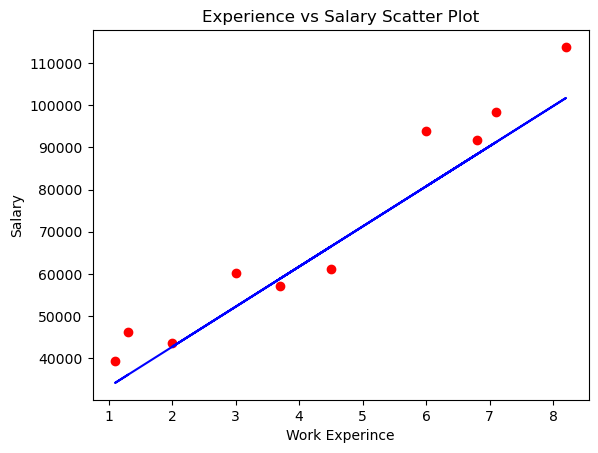

In [44]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_predicition, color = 'blue')
plt.title("Experience vs Salary Scatter Plot")
plt.xlabel("Work Experince")
plt.ylabel("Salary")
plt.show()